TBD:
1. DOCUMENT WITH MDOWN & KTEX
2. GET AN ERRO MATRIX AND A CORRELATION MATRIX
3. check behaviour with DEGREE FAILURE

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from numpy.random import rand as rnd
import numpy as np

In [2]:
#DEF SAMPLE INDEPENDENT VARIABLES

def power_populate(init:float,end:float,N_samp:int, deg=int):
    Vec = np.array(np.linspace(init,end,N_samp)).reshape(-1,1)
    Vec_poly = np.array([np.power(Vec, i) for i in range(deg+1)]).transpose().reshape(len(Vec),deg+1)
    return Vec,Vec_poly

X1,X1_poly = power_populate(-1,1,30, deg=2)
X2,X2_poly = power_populate(-1,1,30, deg=2)

In [3]:
#DEF SAMPLE DEPENDANT VARIALBES

# x1 - x1**2 - 3*x1*x2 + x2**2*x1 -x2**2  +3*x1**2*x2**2 
A = np.array([[ 0, 0,-1],   #a00,...a0g
              [ 1,-3, 1],   
              [-1, 0, 3]]) #ag0,...agg 

Y_2d= np.zeros((X1.shape[0], X1.shape[0]))

for i,x1 in enumerate(X1_poly[:][...]):
    for j,x2 in enumerate(X2_poly[:][...]):
        Y_2d[i,j]+= np.matmul(np.matmul(x1,A),x2.transpose())

Y_2d +=  (np.random.rand(*Y_2d.shape))

In [4]:
X_lstsq = []

for row1 in range(X1_poly.shape[0]):
    for row2 in range(X2_poly.shape[0]):
        X_lstsq.append( [x1*x2 for x1 in X1_poly[row1] for x2 in X2_poly[row2]]  )


X_lstsq=np.array(X_lstsq)

Y_lstsq = Y_2d.flatten()

betha = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_lstsq.transpose(), X_lstsq)), X_lstsq.transpose()),Y_lstsq)
betha = betha.reshape((3,3))

print(betha-A)

[[ 0.5050236  -0.00701037 -0.01459867]
 [-0.00280854 -0.01052296  0.0315606 ]
 [ 0.03596231 -0.00930775 -0.04986427]]


In [5]:
Y_fit= np.zeros((X1.shape[0], X1.shape[0]))

for i,x1 in enumerate(X1_poly[:][...]):
    for j,x2 in enumerate(X2_poly[:][...]):
        Y_fit[i,j]+= np.matmul(np.matmul(x1,betha),x2.transpose())


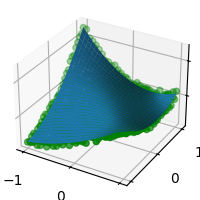

In [6]:

#PLOTTING SAMPLES
plt.style.use('_mpl-gallery')
__,ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(*np.meshgrid(X1,X2), Y_2d, color = "green")
ax.plot_surface(*np.meshgrid(X1,X2), Y_fit,)# alpha=.3)